In [1]:
import sqlite3,csv
conn= sqlite3.connect('fifa_data.db')
cursor = conn.cursor()

In [2]:
import pandas as pd
from pandas.io.sql import to_sql
import numpy as np
#from google.colab import files
#import io

In [3]:
col76_dtype = str
df = pd.read_csv("C:\\Users\\vktof\\OneDrive\\Desktop\\fifa21_data.csv", dtype={'Column76Name': col76_dtype}, low_memory=False)

In [4]:
df = df.rename(columns = {'↓OVA' : 'OVA'})

In [6]:
chunksize = 1000  # Adjust the chunk size as needed
for chunk in np.array_split(df, len(df) / chunksize):
    chunk.to_sql("fifa_data_cleaning", conn, if_exists='append', index=False, method="multi")


In [7]:
asd= pd.read_sql_query(" select * from fifa_data_cleaning" , conn)
asd

ID               Name                      LongName  \
0       158023           L. Messi                  Lionel Messi   
1        20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2       200389           J. Oblak                     Jan Oblak   
3       192985       K. De Bruyne               Kevin De Bruyne   
4       190871          Neymar Jr    Neymar da Silva Santos Jr.   
...        ...                ...                           ...   
246722  247223             Xia Ao                        Ao Xia   
246723  258760           B. Hough                     Ben Hough   
246724  252757        R. McKinley                Ronan McKinley   
246725  243790       Wang Zhen'ao                  Zhen'ao Wang   
246726  252520          Zhou Xiao                     Xiao Zhou   

                                                photoUrl  \
0       https://cdn.sofifa.com/players/158/023/21_60.png   
1       https://cdn.sofifa.com/players/020/801/21_60.png   
2       https://cdn.sofifa.com/players/200/389/21_60.png   
3       https://cdn.sofifa.com/players/192/985/21_60.png   
4       https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                  ...   
246722  https://cdn.sofifa.com/players/247/223/21_60.png   
246723  https://cdn.sofifa.com/players/258/760/21_60.png   
246724  https://cdn.sofifa.com/players/252/757/21_60.png   
246725  https://cdn.sofifa.com/players/243/790/21_60.png   
246726  https://cdn.sofifa.com/players/252/520/21_60.png   

                                                playerUrl Nationality  Age  \
0       http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1       http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2       http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3       http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4       http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                   ...         ...  ...   
246722     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
246723  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
246724  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
246725  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
246726  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

        OVA  POT                      Club  ...     D/W   IR PAC SHO PAS  DRI  \
0        93   93              FC Barcelona  ...     Low  5 ★  85  92  91   95   
1        92   92                  Juventus  ...     Low  5 ★  89  93  81   89   
2        91   93           Atlético Madrid  ...  Medium  3 ★  87  92  78   90   
3        91   91           Manchester City  ...    High  4 ★  76  86  93   88   
4        91   91       Paris Saint-Germain  ...  Medium  5 ★  91  85  86   94   
...     ...  ...                       ...  ...     ...  ...  ..  ..  ..  ...   
246722   47   55        \n\n\n\nWuhan Zall  ...  Medium  1 ★  64  28  26   38   
246723   47   67   \n\n\n\nOldham Athletic  ...  Medium  1 ★  64  40  48   49   
246724   47   65        \n\n\n\nDerry City  ...  Medium  1 ★  63  39  44   46   
246725   47   57  \n\n\n\nDalian YiFang FC  ...  Medium  1 ★  58  49  41   49   
246726   47   57  \n\n\n\nDalian YiFang FC  ...  Medium  1 ★  62  22  39   42   

       DEF PHY  Hits contract_modify  
0       38  65   771            None  
1       35  77   562            None  
2       52  90   150            None  
3       64  78   207            None  
4       36  59   595            None  
...     ..  ..   ...             ...  
246722  48  51  None            None  
246723  35  45  None            None  
246724  40  53  None            None  
246725  30  44  None            None  
246726  45  55  None            None  

[246727 rows x 78 columns]

In [8]:
df.head()

ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   91   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   91   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   91   

   POT                         Club  ...     A/W     D/W   IR PAC SHO  PAS  \
0   93         \n\n\n\nFC Barcelona  ...  Medium     Low  5 ★  85  92   91   
1   92             \n\n\n\nJuventus  ...    High     Low  5 ★  89  93   81   
2   93      \n\n\n\nAtlético Madrid  ...  Medium  Medium  3 ★  87  92   78   
3   91      \n\n\n\nManchester City  ...    High    High  4 ★  76  86   93   
4   91  \n\n\n\nParis Saint-Germain  ...    High  Medium  5 ★  91  85   86   

  DRI DEF PHY Hits  
0  95  38  65  771  
1  89  35  77  562  
2  90  52  90  150  
3  88  64  78  207  
4  94  36  59  595  

[5 rows x 77 columns]

 CONVERT HEIGHT ,WEIGHT COLUMN WHICH CONTAIN STRING AS WELL AS NUMERIC  TO NUMERIC  AND THEN UPDATE THAT IN PRIGNAL TABLE

In [667]:
#df['Height'].unique()
dis_we_hi = pd.read_sql_query(" select Height,Weight , count(*) from fifa_data_cleaning group by Height,Weight ",conn)
dis_we_hi


Height Weight  count(*)
0       155    155         4
1     155cm     57         6
2       156    156         4
3     156cm     58         6
4       157    157         4
...     ...    ...       ...
1060   6'3"    192         6
1061   6'3"    203         6
1062   6'4"    174         6
1063   6'4"    196         6
1064   6'5"    183         6

[1065 rows x 3 columns]

In [666]:
cursor.execute (" UPDATE fifa_data_cleaning SET Weight =CAST(Weight AS DECIMAL(5, 2)); ")
for x in cursor:
    print(x)

In [275]:
#asddf = pd.read_sql_query(" select Height ,Weight ,Age from fifa_data_cleaning",conn)
#asddf
for he in df[['Height','Weight']]:
    values = df[he].unique()
    print(f'{he}-{values}.\n')


Height-['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm'].

Weight-['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '15

In [668]:
cursor.execute("""select distinct(Height) from fifa_data_cleaning """)
for x in cursor:
    print(x) 

('170',)
('187',)
('188',)
('181',)
('175',)
('184',)
('191',)
('178',)
('193',)
('185',)
('199',)
('173',)
('168',)
('176',)
('177',)
('183',)
('180',)
('189',)
('179',)
('195',)
('172',)
('182',)
('186',)
('192',)
('165',)
('194',)
('167',)
('196',)
('163',)
('190',)
('174',)
('169',)
('171',)
('197',)
('200',)
('166',)
('6',)
('164',)
('198',)
('5',)
('201',)
('158',)
('162',)
('161',)
('160',)
('203',)
('157',)
('156',)
('202',)
('159',)
('206',)
('155',)
('170cm',)
('187cm',)
('188cm',)
('181cm',)
('175cm',)
('184cm',)
('191cm',)
('178cm',)
('193cm',)
('185cm',)
('199cm',)
('173cm',)
('168cm',)
('176cm',)
('177cm',)
('183cm',)
('180cm',)
('189cm',)
('179cm',)
('195cm',)
('172cm',)
('182cm',)
('186cm',)
('192cm',)
('165cm',)
('194cm',)
('167cm',)
('196cm',)
('163cm',)
('190cm',)
('174cm',)
('169cm',)
('171cm',)
('197cm',)
('200cm',)
('166cm',)
('6\'2"',)
('164cm',)
('198cm',)
('6\'3"',)
('6\'5"',)
('5\'11"',)
('6\'4"',)
('6\'1"',)
('6\'0"',)
('5\'10"',)
('5\'9"',)
('5\'6"',)
('5\'7

In [669]:
ast=cursor.execute (" UPDATE fifa_data_cleaning SET Height =CAST(Height AS DECIMAL(5, 2)); ")
for x in ast:
    print(x)

In [670]:
cursor.execute("""select Height, weight, count() from fifa_data_cleaning group by Height,Weight""")


In [671]:
for x in cursor :
    print(x)

('155', '155', 4)
('155', '57', 6)
('156', '156', 4)
('156', '58', 6)
('157', '157', 4)
('157', '71', 6)
('158', '158', 12)
('158', '56', 12)
('158', '58', 6)
('159', '159', 8)
('159', '58', 6)
('159', '59', 6)
('160', '160', 28)
('160', '55', 6)
('160', '57', 12)
('160', '60', 18)
('160', '61', 6)
('161', '161', 24)
('161', '57', 12)
('161', '58', 6)
('161', '59', 6)
('161', '60', 6)
('161', '61', 6)
('162', '162', 52)
('162', '52', 6)
('162', '55', 6)
('162', '57', 6)
('162', '58', 6)
('162', '59', 6)
('162', '62', 6)
('162', '63', 6)
('162', '64', 12)
('162', '65', 12)
('162', '66', 6)
('162', '76', 6)
('163', '163', 76)
('163', '57', 6)
('163', '58', 18)
('163', '59', 18)
('163', '60', 18)
('163', '61', 6)
('163', '62', 12)
('163', '63', 12)
('163', '64', 6)
('163', '66', 6)
('163', '70', 6)
('163', '74', 6)
('164', '164', 124)
('164', '52', 6)
('164', '53', 6)
('164', '54', 6)
('164', '58', 6)
('164', '59', 6)
('164', '60', 42)
('164', '61', 18)
('164', '62', 6)
('164', '63', 24)


In [674]:
pd.read_sql_query("""select Height, weight from fifa_data_cleaning """,conn)

Height Weight
0         170    170
1         187    187
2         188    188
3         181    181
4         175    175
...       ...    ...
189785    178     66
189786    175     65
189787    179     74
189788    175     69
189789    188     75

[189790 rows x 2 columns]

In [673]:
for he in df[['Height','Weight']]:
    values = df[he].unique()
    print(f'{he}-{values}.\n')

Height-['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm' '199cm' '173cm' '168cm' '176cm' '177cm' '183cm' '180cm' '189cm'
 '179cm' '195cm' '172cm' '182cm' '186cm' '192cm' '165cm' '194cm' '167cm'
 '196cm' '163cm' '190cm' '174cm' '169cm' '171cm' '197cm' '200cm' '166cm'
 '6\'2"' '164cm' '198cm' '6\'3"' '6\'5"' '5\'11"' '6\'4"' '6\'1"' '6\'0"'
 '5\'10"' '5\'9"' '5\'6"' '5\'7"' '5\'4"' '201cm' '158cm' '162cm' '161cm'
 '160cm' '203cm' '157cm' '156cm' '202cm' '159cm' '206cm' '155cm'].

Weight-['72kg' '83kg' '87kg' '70kg' '68kg' '80kg' '71kg' '91kg' '73kg' '85kg'
 '92kg' '69kg' '84kg' '96kg' '81kg' '82kg' '75kg' '86kg' '89kg' '74kg'
 '76kg' '64kg' '78kg' '90kg' '66kg' '60kg' '94kg' '79kg' '67kg' '65kg'
 '59kg' '61kg' '93kg' '88kg' '97kg' '77kg' '62kg' '63kg' '95kg' '100kg'
 '58kg' '183lbs' '179lbs' '172lbs' '196lbs' '176lbs' '185lbs' '170lbs'
 '203lbs' '168lbs' '161lbs' '146lbs' '130lbs' '190lbs' '174lbs' '148lbs'
 '165lbs' '159lbs' '192lbs' '181lbs' '139lbs' '15

Remove the  unnecessary newline characters from all columns that have them.

In [676]:
#df["Club"].head()
cursor.execute("select  REPLACE(Club, '\n', '') from fifa_data_cleaning limit 5" )
for x in cursor:
    print(x)

('FC Barcelona',)
('Juventus',)
('Atlético Madrid',)
('Manchester City',)
('Paris Saint-Germain',)


In [688]:
cursor.execute(" UPDATE fifa_data_cleaning SET Club = REPLACE(Club, '\n', '') ")

In [689]:
#cursor.execute(" UPDATE fifa_data_cleaning SET Club = REPLACE(Club, '\n', '') ")
pd.read_sql_query("select age,Height,Weight,Club from fifa_data_cleaning limit 10",conn)


Age Height Weight                 Club
0   33    170    170         FC Barcelona
1   35    187    187             Juventus
2   27    188    188      Atlético Madrid
3   29    181    181      Manchester City
4   28    175    175  Paris Saint-Germain
5   31    184    184    FC Bayern München
6   28    175    175            Liverpool
7   27    191    191            Liverpool
8   21    178    178  Paris Saint-Germain
9   28    187    187         FC Barcelona

CHECKING WHICH COLUMN HAS NEWLINES CHARACTERS

In [238]:
# Create an empty list to store columns with newline characters
columns_with_newlines = []

# Iterate through columns and check for newline characters
for column in df.columns:
    if df[column].apply(lambda x: '\n' in str(x)).any():
        columns_with_newlines.append(column)

# Display columns with newline characters
if columns_with_newlines:
    print("Columns with unnecessary newline characters:")
    for col in columns_with_newlines:
        print(col)
else:
    print("No columns with unnecessary newline characters found.")


Columns with unnecessary newline characters:
Club


RENAME COLUMN  ↓OVA TO OVA 

In [679]:
fifa_data_cleaning = cursor.execute("ALTER table fifa_data_cleaning rename column ↓OVA to OVA ")
fifa_data_cleaning

OperationalError: no such column: "↓OVA"

In [680]:
df = df.rename(columns = {'↓OVA' : 'OVA'})

In [681]:
chunksize = 1000  # Adjust the chunk size as needed
for chunk in np.array_split(df, len(df) / chunksize):
    chunk.to_sql("fifa_data_cleaning", conn, if_exists='append', index=False, method="multi")

ADDING  % SIGN IN COLUMN  OVA,POT ,BOV

In [493]:
# ADD % SIGN IN OVA column 
query = "SELECT COALESCE(OVA || '%', 'N/A') AS OVA FROM fifa_data_cleaning"

# Execute the query and read the results into a DataFrame
result_df = pd.read_sql_query(query, conn)
result_df

OVA
0       93%
1       92%
2       91%
3       91%
4       91%
...     ...
132848  47%
132849  47%
132850  47%
132851  47%
132852  47%

[132853 rows x 1 columns]

In [272]:
query = "SELECT COALESCE(OVA || '%', 'N/A') AS OVA, COALESCE(POT || '%', 'N/A') AS POT, COALESCE(BOV || '%', 'N/A') AS BOV FROM fifa_data_cleaning"

# Execute the query and read the results into a DataFrame
result_df = pd.read_sql_query(query, conn)
result_df

OVA  POT  BOV
0      93%  93%  93%
1      92%  92%  92%
2      91%  93%  91%
3      91%  91%  91%
4      91%  91%  91%
...    ...  ...  ...
75911  47%  55%  49%
75912  47%  67%  51%
75913  47%  65%  49%
75914  47%  57%  48%
75915  47%  57%  50%

[75916 rows x 3 columns]

In [751]:
#pd.read_sql_query('select Age,OVA,POT,BOV FROM fifa_data_cleaning',conn)
sql_statement = f"PRAGMA table_info({'fifa_data_cleaning'})"

# Execute the SQL query
cursor.execute(sql_statement)

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    column_name, data_type = row[1], row[2]
    print(f"Column: {column_name}, Data Type: {data_type}")

    

Column: ID, Data Type: INTEGER
Column: Name, Data Type: TEXT
Column: LongName, Data Type: TEXT
Column: photoUrl, Data Type: TEXT
Column: playerUrl, Data Type: TEXT
Column: Nationality, Data Type: TEXT
Column: Age, Data Type: INTEGER
Column: OVA, Data Type: INTEGER
Column: POT, Data Type: INTEGER
Column: Club, Data Type: TEXT
Column: Contract, Data Type: TEXT
Column: Positions, Data Type: TEXT
Column: Height, Data Type: TEXT
Column: Weight, Data Type: TEXT
Column: Preferred Foot, Data Type: TEXT
Column: BOV, Data Type: INTEGER
Column: Best Position, Data Type: TEXT
Column: Joined, Data Type: TEXT
Column: Loan Date End, Data Type: TEXT
Column: Value, Data Type: TEXT
Column: Wage, Data Type: TEXT
Column: Release Clause, Data Type: TEXT
Column: Attacking, Data Type: INTEGER
Column: Crossing, Data Type: INTEGER
Column: Finishing, Data Type: INTEGER
Column: Heading Accuracy, Data Type: INTEGER
Column: Short Passing, Data Type: INTEGER
Column: Volleys, Data Type: INTEGER
Column: Skill, Data T

In [290]:
#conn.commit()
cursor.execute("select count(*) from fifa_data_cleaning")
for x in cursor:
    print(x)

(75916,)


 FETCH ALL COUMN WHICH INCLUDE IN TABLE

In [135]:
cursor.execute('select count(name)from PRAGMA_TABLE_INFO("fifa_data_cleaning") ')
for x in cursor:
    print(x)

(77,)


 FIND HOW MANY TABLE IN OUR DATABASE

In [ ]:
cursor.execute( 'select name from sqlite_master where type = "table"  ')
for x in cursor :
    print(x)


 FIND HOW MANY TABLE IN OUR DATABASE

In [79]:
cursor.execute ('select name from sqlite_master where type="table" ')
table_list = [table[0] for table in cursor.fetchall()]
table_list

['fifa_data_cleaning']

In [292]:
cursor.execute ('select name from sqlite_master where type="table" ')
for x in cursor:
    print(x)


('fifa_data_cleaning',)


           FINDING IS THERE ANY NULL VALUE IN OUR TABLE

In [100]:
for table in table_list:
    print('\ntable:', table)
    df_table =pd.read_sql_query(f"select * from {table}",conn)
    print(df_table.isnull().sum())


table: fifa_data_cleaning
ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         7785
Length: 77, dtype: int64


                   FINDING DUPLICATES IN TABLE

In [696]:
read_duplicate = pd.read_sql_query("SELECT LongName, Age, Club, Nationality, COUNT(*) as dup FROM fifa_data_cleaning GROUP BY LongName, Age, Club, Nationality HAVING COUNT(*)>1 ",conn)
read_duplicate  

LongName  Age                   Club Nationality  \
0      A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
1                    A.J. DeLaGarza   32            Inter Miami        Guam   
2                   AJ Leitch-Smith   30              Morecambe     England   
3                        Aapo Halme   22               Barnsley     Finland   
4              Aaron Amadi-Holloway   27          Brisbane Roar       Wales   
...                             ...  ...                    ...         ...   
18973                   Ștefan Cană   19          FCSB (Steaua)     Romania   
18974                   Ștefan Radu   33                  Lazio     Romania   
18975                   Ștefan Rusu   20       Politehnica Iaşi     Romania   
18976              Ștefan Târnovanu   20          FCSB (Steaua)     Romania   
18977                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   

       dup  
0       11  
1       11  
2       11  
3       11  
4       11  
...    ...  
18973   11  
18974   11  
18975   11  
18976   11  
18977   11  

[18978 rows x 5 columns]

                   FINDING DUPLICATES IN TABLE

In [699]:
read_duplicates = " SELECT LongName, Age, Club, Nationality, ROW_NUMBER() OVER (PARTITION BY LongName) AS rn FROM fifa_data_cleaning  "
pd.read_sql_query(read_duplicates, conn)

LongName  Age                   Club Nationality  \
0       A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
1       A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
2       A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
3       A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
4       A. Benjamin Chiamuloira Paes   20          Internacional      Brazil   
...                              ...  ...                    ...         ...   
208764                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   
208765                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   
208766                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   
208767                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   
208768                Ștefan Vlădoiu   21  Universitatea Craiova     Romania   

        rn  
0        1  
1        2  
2        3  
3        4  
4        5  
...     ..  
208764   7  
208765   8  
208766   9  
208767  10  
208768  11  

[208769 rows x 5 columns]

In [704]:
row_duplicate = pd.read_sql_query(" with rowcte as(SELECT *, row_number() over(partition by LongName, Age, Club, Nationality) rn FROM fifa_data_cleaning) select * from rowcte where rn >1  ",conn)
row_duplicate 

ID                 Name                      LongName  \
0       230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
1       230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
2       230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
3       230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
4       230212  Antônio Chiamuloira  A. Benjamin Chiamuloira Paes   
...        ...                  ...                           ...   
189786  247949           �. Vlădoiu                Ștefan Vlădoiu   
189787  247949           �. Vlădoiu                Ștefan Vlădoiu   
189788  247949           �. Vlădoiu                Ștefan Vlădoiu   
189789  247949           �. Vlădoiu                Ștefan Vlădoiu   
189790  247949           �. Vlădoiu                Ștefan Vlădoiu   

                                                photoUrl  \
0       https://cdn.sofifa.com/players/230/212/21_60.png   
1       https://cdn.sofifa.com/players/230/212/21_60.png   
2       https://cdn.sofifa.com/players/230/212/21_60.png   
3       https://cdn.sofifa.com/players/230/212/21_60.png   
4       https://cdn.sofifa.com/players/230/212/21_60.png   
...                                                  ...   
189786  https://cdn.sofifa.com/players/247/949/21_60.png   
189787  https://cdn.sofifa.com/players/247/949/21_60.png   
189788  https://cdn.sofifa.com/players/247/949/21_60.png   
189789  https://cdn.sofifa.com/players/247/949/21_60.png   
189790  https://cdn.sofifa.com/players/247/949/21_60.png   

                                                playerUrl Nationality  Age  \
0       http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   
1       http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   
2       http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   
3       http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   
4       http://sofifa.com/player/230212/a-benjamin-chi...      Brazil   20   
...                                                   ...         ...  ...   
189786  http://sofifa.com/player/247949/stefan-vladoiu...     Romania   21   
189787  http://sofifa.com/player/247949/stefan-vladoiu...     Romania   21   
189788  http://sofifa.com/player/247949/stefan-vladoiu...     Romania   21   
189789  http://sofifa.com/player/247949/stefan-vladoiu...     Romania   21   
189790  http://sofifa.com/player/247949/stefan-vladoiu...     Romania   21   

        OVA  POT                   Club  ...   IR PAC SHO PAS DRI  DEF PHY  \
0        78   78          Internacional  ...  1 ★  68  48  60  52   79  75   
1        78   78          Internacional  ...  1 ★  68  48  60  52   79  75   
2        78   78          Internacional  ...  1 ★  68  48  60  52   79  75   
3        78   78          Internacional  ...  1 ★  68  48  60  52   79  75   
4        78   78          Internacional  ...  1 ★  68  48  60  52   79  75   
...     ...  ...                    ...  ...  ...  ..  ..  ..  ..  ...  ..   
189786   66   74  Universitatea Craiova  ...  1 ★  78  35  54  59   62  65   
189787   66   74  Universitatea Craiova  ...  1 ★  78  35  54  59   62  65   
189788   66   74  Universitatea Craiova  ...  1 ★  78  35  54  59   62  65   
189789   66   74  Universitatea Craiova  ...  1 ★  78  35  54  59   62  65   
189790   66   74  Universitatea Craiova  ...  1 ★  78  35  54  59   62  65   

       Hits contract_modify  rn  
0        16            None   2  
1        16            None   3  
2        16            None   4  
3        16            None   5  
4        16            None   6  
...     ...             ...  ..  
189786    4            None   7  
189787    4            None   8  
189788    4            None   9  
189789    4            None  10  
189790    4            None  11  

[189791 rows x 79 columns]

In [703]:
# Execute the query
cursor.execute("SELECT LongName, Age, Club, Nationality, COUNT(*) as dup FROM fifa_data_cleaning GROUP BY LongName, Age, Club, Nationality HAVING COUNT(*)>1 ")

# Fetch the results
results = cursor.fetchall()

# Get column names from the cursor description
column_names = [asc[0] for asc in cursor.description]

# Print column names
print(column_names)

# Print the query results
for row in results:
    print(row)


['LongName', 'Age', 'Club', 'Nationality', 'dup']
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 11)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 11)
('AJ Leitch-Smith', 30, 'Morecambe', 'England', 11)
('Aapo Halme', 22, 'Barnsley', 'Finland', 11)
('Aaron Amadi-Holloway', 27, 'Brisbane Roar', 'Wales', 11)
('Aaron Anderson', 19, 'Melbourne Victory', 'Australia', 11)
('Aaron Appindangoye', 28, 'Sivasspor', 'Gabon', 11)
('Aaron Bastiaans', 18, 'VVV-Venlo', 'Netherlands', 11)
('Aaron Berzel', 28, 'Türkgücü München', 'Germany', 11)
('Aaron Bolger', 20, 'Shamrock Rovers', 'Republic of Ireland', 11)
('Aaron Boupendza', 23, 'Hatayspor', 'Gabon', 11)
('Aaron Calver', 24, 'Western United FC', 'Australia', 11)
('Aaron Collins', 23, 'Forest Green Rovers', 'Wales', 11)
('Aaron Connolly', 20, 'Brighton & Hove Albion', 'Republic of Ireland', 11)
('Aaron Cresswell', 30, 'West Ham United', 'England', 11)
('Aaron Dobbs', 21, 'Shelbourne FC', 'Republic of Ireland', 11)
('Aaron Drinan', 

In [706]:
# Execute the query
cursor.execute(" with rowcte as(SELECT LongName, Age, Club, Nationality, row_number() over(partition by LongName, Age, Club, Nationality) rn FROM fifa_data_cleaning) select * from rowcte where rn >1  limit 20")
# Fetch the results
results = cursor.fetchall()
column_names = [asc[0] for asc in cursor.description]
print(column_names)
for row in results:
    print(row)

['LongName', 'Age', 'Club', 'Nationality', 'rn']
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 2)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 3)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 4)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 5)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 6)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 7)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 8)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 9)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 10)
('A. Benjamin Chiamuloira Paes', 20, 'Internacional', 'Brazil', 11)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 2)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 3)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 4)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 5)
('A.J. DeLaGarza', 32, 'Inter Miami', 'Guam', 6)
('A.J. DeLaGarza', 32, 'Inter Miam

In [707]:
for table in table_list:
    print('\ntable:', table)
    column_info = conn.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[0:3])


table: fifa_data_cleaning
(0, 'ID', 'INTEGER')
(1, 'Name', 'TEXT')
(2, 'LongName', 'TEXT')
(3, 'photoUrl', 'TEXT')
(4, 'playerUrl', 'TEXT')
(5, 'Nationality', 'TEXT')
(6, 'Age', 'INTEGER')
(7, 'OVA', 'INTEGER')
(8, 'POT', 'INTEGER')
(9, 'Club', 'TEXT')
(10, 'Contract', 'TEXT')
(11, 'Positions', 'TEXT')
(12, 'Height', 'TEXT')
(13, 'Weight', 'TEXT')
(14, 'Preferred Foot', 'TEXT')
(15, 'BOV', 'INTEGER')
(16, 'Best Position', 'TEXT')
(17, 'Joined', 'TEXT')
(18, 'Loan Date End', 'TEXT')
(19, 'Value', 'TEXT')
(20, 'Wage', 'TEXT')
(21, 'Release Clause', 'TEXT')
(22, 'Attacking', 'INTEGER')
(23, 'Crossing', 'INTEGER')
(24, 'Finishing', 'INTEGER')
(25, 'Heading Accuracy', 'INTEGER')
(26, 'Short Passing', 'INTEGER')
(27, 'Volleys', 'INTEGER')
(28, 'Skill', 'INTEGER')
(29, 'Dribbling', 'INTEGER')
(30, 'Curve', 'INTEGER')
(31, 'FK Accuracy', 'INTEGER')
(32, 'Long Passing', 'INTEGER')
(33, 'Ball Control', 'INTEGER')
(34, 'Movement', 'INTEGER')
(35, 'Acceleration', 'INTEGER')
(36, 'Sprint Speed', '

      MODIFY CONTRACT COLUMN  INTO ACTIVE,FREE,ON LOAN

In [343]:
pd.read_sql_query("select distinct(Contract) from fifa_data_cleaning ",conn)

Contract
0             2004 ~ 2021
1             2018 ~ 2022
2             2014 ~ 2023
3             2015 ~ 2023
4             2017 ~ 2022
..                    ...
126   Jan 4, 2021 On Loan
127  Nov 30, 2020 On Loan
128           2004 ~ 2020
129           2009 ~ 2025
130   Aug 1, 2021 On Loan

[131 rows x 1 columns]

In [367]:
modi_contract = ("SELECT Contract, case when  Contract like '%On Loan%' then 'On Loan' when  Contract like '%~%' then 'Active' when  Contract like '%Free%' then 'Free' else Contract end as s FROM fifa_data_cleaning")
cursor.execute(modi_contract)
results = cursor.fetchall()
for row in results:
     print(row)
    

In [708]:
sd = "SELECT distinct(contract) ,CASE WHEN Contract LIKE '%On Loan%' THEN 'On Loan' WHEN Contract LIKE '%~%' THEN 'Active' WHEN Contract LIKE '%Free%' THEN 'Free' ELSE Contract  END as contact_new from fifa_data_cleaning"
pd.read_sql_query(sd,conn)

Contract contact_new
0             2004 ~ 2021      Active
1             2018 ~ 2022      Active
2             2014 ~ 2023      Active
3             2015 ~ 2023      Active
4             2017 ~ 2022      Active
..                    ...         ...
126   Jan 4, 2021 On Loan     On Loan
127  Nov 30, 2020 On Loan     On Loan
128           2004 ~ 2020      Active
129           2009 ~ 2025      Active
130   Aug 1, 2021 On Loan     On Loan

[131 rows x 2 columns]

     ADDING NEW TABLE CONTRACT_MODIFY

In [709]:
cursor.execute(" alter TABLE fifa_data_cleaning add contract_modify VARCHAR(255)")

OperationalError: duplicate column name: contract_modify

In [710]:
cursor.execute(" UPDATE fifa_data_cleaning set contract_modify = (CASE WHEN Contract LIKE '%On Loan%' THEN 'On Loan' WHEN Contract LIKE '%~%' THEN 'Active' WHEN Contract LIKE '%Free%' THEN 'Free' ELSE Contract  END ) ")


In [712]:
pd.read_sql_query("select contract_modify, Contract  from fifa_data_Cleaning ",conn)

contract_modify     Contract
0               Active  2004 ~ 2021
1               Active  2018 ~ 2022
2               Active  2014 ~ 2023
3               Active  2015 ~ 2023
4               Active  2017 ~ 2022
...                ...          ...
208764          Active  2018 ~ 2022
208765          Active  2020 ~ 2021
208766          Active  2019 ~ 2020
208767          Active  2020 ~ 2022
208768          Active  2019 ~ 2023

[208769 rows x 2 columns]

In [388]:
#df[['Positions', 'Best Position']].info()
# 'Positions' and 'Best Position' column was inspected and it was observed that the entry values in both looks similar.
#Then, it was realize that 'Positions' column had one and also extra position for each player that had more than one position.
#'Positions' column was dropped from the fifa_df. Because, it was already in 'Best Position' column but only one specific position to a player.
#'Best Position' column data type was object which is correct. 

cursor.execute("ALTER TABLE fifa_Data_cleaning DROP COLUMN 'Positions'")

OperationalError: no such column: "'Positions'"

In [414]:
df['Best Position'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Best Position
Non-Null Count  Dtype 
--------------  ----- 
18979 non-null  object
dtypes: object(1)
memory usage: 148.4+ KB


    CONVERTE JOINE COLUMN DATA INTO DATE FORMATE

In [713]:
df[['Joined']]

Joined
0       Jul 1, 2004
1      Jul 10, 2018
2      Jul 16, 2014
3      Aug 30, 2015
4       Aug 3, 2017
...             ...
18974  Jul 13, 2018
18975   Aug 1, 2020
18976   Mar 8, 2019
18977  Sep 22, 2020
18978  Jul 29, 2019

[18979 rows x 1 columns]

In [714]:
pd.read_sql_query(""" SELECT SUBSTR(Joined, -4) || '-' || 
            CASE
                WHEN SUBSTR(Joined, 1, 3) = 'Jan' THEN '01'
                WHEN SUBSTR(Joined, 1, 3) = 'Feb' THEN '02'
                WHEN SUBSTR(Joined, 1, 3) = 'Mar' THEN '03'
                WHEN SUBSTR(Joined, 1, 3) = 'Apr' THEN '04'
                WHEN SUBSTR(Joined, 1, 3) = 'May' THEN '05'
                WHEN SUBSTR(Joined, 1, 3) = 'Jun' THEN '06'
                WHEN SUBSTR(Joined, 1, 3) = 'Jul' THEN '07'
                WHEN SUBSTR(Joined, 1, 3) = 'Aug' THEN '08'
                WHEN SUBSTR(Joined, 1, 3) = 'Sep' THEN '09'
                WHEN SUBSTR(Joined, 1, 3) = 'Oct' THEN '10'
                WHEN SUBSTR(Joined, 1, 3) = 'Nov' THEN '11'
                WHEN SUBSTR(Joined, 1, 3) = 'Dec' THEN '12'
            END || '-' || SUBSTR(Joined, 5, 2) as date_converted
                     from fifa_data_cleaning """,conn   )


date_converted
0          2004-07-1,
1          2018-07-10
2          2014-07-16
3          2015-08-30
4          2017-08-3,
...               ...
208764     2018-07-13
208765     2020-08-1,
208766     2019-03-8,
208767     2020-09-22
208768     2019-07-29

[208769 rows x 1 columns]

In [715]:
df['Joined']=pd.to_datetime( df['Joined'] )
df['Joined'].head()


0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]

In [716]:
cursor.execute(""" UPDATE fifa_data_cleaning SET Joined = SUBSTR(Joined, -4) || '-' || 
            CASE
                WHEN SUBSTR(Joined, 1, 3) = 'Jan' THEN '01'
                WHEN SUBSTR(Joined, 1, 3) = 'Feb' THEN '02'
                WHEN SUBSTR(Joined, 1, 3) = 'Mar' THEN '03'
                WHEN SUBSTR(Joined, 1, 3) = 'Apr' THEN '04'
                WHEN SUBSTR(Joined, 1, 3) = 'May' THEN '05'
                WHEN SUBSTR(Joined, 1, 3) = 'Jun' THEN '06'
                WHEN SUBSTR(Joined, 1, 3) = 'Jul' THEN '07'
                WHEN SUBSTR(Joined, 1, 3) = 'Aug' THEN '08'
                WHEN SUBSTR(Joined, 1, 3) = 'Sep' THEN '09'
                WHEN SUBSTR(Joined, 1, 3) = 'Oct' THEN '10'
                WHEN SUBSTR(Joined, 1, 3) = 'Nov' THEN '11'
                WHEN SUBSTR(Joined, 1, 3) = 'Dec' THEN '12'
            END || '-' || SUBSTR(Joined, 5, 2) 
                    """)

In [724]:
cursor.execute("select Name,Club,Joined from fifa_data_cleaning limit 5 ")
results = cursor.fetchall()
column = [col[0] for col in cursor.description]
print (column)
for x in results:
     print(x)
        
   
                        

['Name', 'Club', 'Joined']
('L. Messi', 'FC Barcelona', '2004-07-1,')
('Cristiano Ronaldo', 'Juventus', '2018-07-10')
('J. Oblak', 'Atlético Madrid', '2014-07-16')
('K. De Bruyne', 'Manchester City', '2015-08-30')
('Neymar Jr', 'Paris Saint-Germain', '2017-08-3,')


In [778]:
#Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!

query = """
SELECT Name,Club,Joined
FROM fifa_data_cleaning
WHERE strftime('%Y', 'now') - strftime('%Y', "Joined") >= 10;
"""

pd.read_sql_query(query,conn)


Name                                 Club      Joined
0          Casemiro                          Real Madrid  2013-07-11
1         S. Agüero                      Manchester City  2011-07-28
2         H. Lloris                    Tottenham Hotspur  2012-08-31
3         T. Müller                    FC Bayern München  2008-08-10
4       M. Verratti                  Paris Saint-Germain  2012-07-18
...             ...                                  ...         ...
1091  J. Gustavsson                          Mjällby AIF  2013-08-19
1092         M. Jay                          Exeter City  2012-08-12
1093        Wu Qing  Chongqing Dangdai Lifan FC SWM Team  2013-01-16
1094     J. Huysman                        USL Dunkerque  2011-07-16
1095     Sun Shoubo                           Wuhan Zall  2013-02-15

[1096 rows x 3 columns]

     FILL LOAN DATE END COLUMN WITH NULL VALUE WHERE ROW IN COLUMN IS NONE

In [476]:
pd.read_sql_query("select `Loan Date End` from fifa_data_cleaning where `Loan Date End` is  null",conn)

Loan Date End
0              None
1              None
2              None
3              None
4              None
...             ...
71859          None
71860          None
71861          None
71862          None
71863          None

[71864 rows x 1 columns]

In [725]:
cursor.execute(" SELECT COALESCE(`Loan Date End`, 'Null') AS `Loan Date`  FROM   fifa_data_cleaning where `Loan Date End` is  null")
for x in cursor:
    print(x)

('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)
('Null',)


In [505]:
cursor.execute(" UPDATE fifa_data_cleaning SET `Loan Date End` = COALESCE(`Loan Date End`, 'Null')")

In [508]:
pd.read_sql_query("select `Loan Date End` from fifa_Data_cleaning  limit 5",conn)

Loan Date End
0          Null
1          Null
2          Null
3          Null
4          Null

            LOOKING INTO Value" ,"Wage", "Release Clause", "Hits" COLUMN AND CHANGE WHAT WE NEED TO DO

In [726]:
#for column in df[["Value" ,"Wage", "Release Clause", "Hits"]]:
 #   values = df[column].unique()
  #  print(f'{column }-{values}.\n')
pd.read_sql_query(" select Value , Wage,`Release Clause`, Hits from fifa_data_cleaning", conn)   

Value  Wage Release Clause  Hits
0       103.5M  560K         138.4M   771
1          63M  220K          75.9M   562
2         120M  125K         159.4M   150
3         129M  370K           161M   207
4         132M  270K         166.5M   595
...        ...   ...            ...   ...
208764   €100K   €1K           €70K  None
208765   €130K  €500          €165K  None
208766   €120K  €500          €131K  None
208767   €100K   €2K           €88K  None
208768   €100K   €1K           €79K  None

[208769 rows x 4 columns]

In [728]:
pd.read_sql_query(" select Value , Wage,`Release Clause`,Hits from fifa_data_cleaning", conn) 

Value  Wage Release Clause Hits
0       103.5M  560K         138.4M  771
1          63M  220K          75.9M  562
2         120M  125K         159.4M  150
3         129M  370K           161M  207
4         132M  270K         166.5M  595
...        ...   ...            ...  ...
208764   €100K   €1K           €70K    0
208765   €130K  €500          €165K    0
208766   €120K  €500          €131K    0
208767   €100K   €2K           €88K    0
208768   €100K   €1K           €79K    0

[208769 rows x 4 columns]

             FILLING "HITS" COLUMN WITH 0 WHERE ROW IS EMPTY

In [727]:
cursor.execute(" UPDATE fifa_data_cleaning SET Hits = COALESCE(Hits, '0')")

In [617]:
 pd.read_sql_query("select Value,Wage, `Release Clause`  from fifa_data_cleaning",conn)

Value    Wage Release Clause
0       103000000  560000      138000000
1        63000000  220000       75000000
2       120000000  125000      159000000
3       129000000  370000      161000000
4       132000000  270000      166000000
...           ...     ...            ...
151827     100000    1000          70000
151828     130000     500         165000
151829     120000     500         131000
151830     100000    2000          88000
151831     100000    1000          79000

[151832 rows x 3 columns]

          REMOVING  € FROM " Value,Wage	,Release Clause " COLUMN 

In [596]:
cursor.execute(" UPDATE fifa_data_cleaning SET Value = REPLACE(Value, '€', '')")

In [729]:
cursor.execute(" UPDATE fifa_data_cleaning SET Wage = REPLACE(Wage, '€', '')")

In [730]:
cursor.execute(" UPDATE fifa_data_cleaning SET `Release Clause` = REPLACE(`Release Clause`, '€', '')")

         USING CASE SATEMENT CONVETING K , M INTO 1000,1000000

In [600]:
 pd.read_sql_query("""select 
                   CASE 
                   WHEN Value LIKE '%k' THEN CAST(REPLACE(Value, 'k', '') AS INTEGER) * 1000 
                   WHEN Value LIKE '%M' THEN CAST(REPLACE(Value, 'M', '') AS INTEGER) * 1000000 
                   ELSE Value 
                END  update_value from fifa_data_cleaning""",conn)
    


update_value
0         103000000
1          63000000
2         120000000
3         129000000
4         132000000
...             ...
151827       100000
151828       130000
151829       120000
151830       100000
151831       100000

[151832 rows x 1 columns]

In [602]:
# pd.read_sql_query("""select 
 #                  CASE 
  #                 WHEN Wage LIKE '%k' THEN CAST(REPLACE(Wage, 'k', '') AS INTEGER) * 1000 
   #                WHEN Wage LIKE '%M' THEN CAST(REPLACE(Wage, 'M', '') AS INTEGER) * 1000000 
    #               ELSE Wage 
     #           END  update_value from fifa_data_cleaning""",conn)
# pd.read_sql_query("""select 
 #                  CASE 
  #                 WHEN `Release Clause` LIKE '%k' THEN CAST(REPLACE(`Release Clause`, 'k', '') AS INTEGER) * 1000 
   #                WHEN `Release Clause` LIKE '%M' THEN CAST(REPLACE(`Release Clause`, 'M', '') AS INTEGER) * 1000000 
    #               ELSE `Release Clause` 
     #           END  update_value from fifa_data_cleaning""",conn)
                

In [731]:
cursor.execute("UPDATE fifa_data_cleaning SET Value = \
               CASE \
                   WHEN Value LIKE '%k' THEN CAST(REPLACE(Value, 'k', '') AS INTEGER) * 1000 \
                   WHEN Value LIKE '%M' THEN CAST(REPLACE(Value, 'M', '') AS INTEGER) * 1000000 \
                   ELSE Value \
               END")

In [732]:
cursor.execute("UPDATE fifa_data_cleaning SET Wage = \
               CASE \
                   WHEN Wage LIKE '%k' THEN CAST(REPLACE(Wage, 'k', '') AS INTEGER) * 1000 \
                   WHEN Wage LIKE '%M' THEN CAST(REPLACE(Wage, 'M', '') AS INTEGER) * 1000000 \
                   ELSE Wage \
               END")

In [733]:
cursor.execute("UPDATE fifa_data_cleaning SET `Release Clause` = \
               CASE \
                   WHEN `Release Clause` LIKE '%k' THEN CAST(REPLACE(`Release Clause`, 'k', '') AS INTEGER) * 1000 \
                   WHEN `Release Clause` LIKE '%M' THEN CAST(REPLACE(`Release Clause`, 'M', '') AS INTEGER) * 1000000 \
                   ELSE `Release Clause` \
               END")

In [734]:
cursor.execute("select `Release Clause` from fifa_data_cleaning limit 5 ")
for x in cursor:
    print(x)


('138000000',)
('75000000',)
('159000000',)
('161000000',)
('166000000',)


         CHECKING ANY OF THESE COLUMN HAVE ANY NULL 

In [631]:
df[['Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
         'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
         'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression',
         'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
         'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
         'Total Stats', 'Base Stats', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].isnull().sum() # info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Attacking         18979 non-null  int64 
 1   Crossing          18979 non-null  int64 
 2   Finishing         18979 non-null  int64 
 3   Heading Accuracy  18979 non-null  int64 
 4   Short Passing     18979 non-null  int64 
 5   Volleys           18979 non-null  int64 
 6   Skill             18979 non-null  int64 
 7   Dribbling         18979 non-null  int64 
 8   Curve             18979 non-null  int64 
 9   FK Accuracy       18979 non-null  int64 
 10  Long Passing      18979 non-null  int64 
 11  Ball Control      18979 non-null  int64 
 12  Movement          18979 non-null  int64 
 13  Acceleration      18979 non-null  int64 
 14  Sprint Speed      18979 non-null  int64 
 15  Agility           18979 non-null  int64 
 16  Reactions         18979 non-null  int64 
 17  Balance     

                 W/F, SM and IR

In [737]:
pd.read_sql_query("select `W/F`, SM , IR  from fifa_data_cleaning",conn)

W/F  SM   IR
0       4 ★  4★  5 ★
1       4 ★  5★  5 ★
2       3 ★  1★  3 ★
3       5 ★  4★  4 ★
4       5 ★  5★  5 ★
...     ...  ..  ...
208764  2 ★  2★  1 ★
208765  2 ★  2★  1 ★
208766  2 ★  2★  1 ★
208767  3 ★  2★  1 ★
208768  3 ★  2★  1 ★

[208769 rows x 3 columns]

In [779]:
pd.read_sql_query("select replace(`W/F`,'★','') as `W/F`,replace(SM,'★','') AS SM ,replace(IR,'★','') AS IR  from fifa_data_cleaning",conn)

W/F SM IR
0        4  4  5
1        4  5  5
2        3  1  3
3        5  4  4
4        5  5  5
...     .. .. ..
208764   2  2  1
208765   2  2  1
208766   2  2  1
208767   3  2  1
208768   3  2  1

[208769 rows x 3 columns]

In [755]:
cursor.execute("UPDATE fifa_data_cleaning SET `W/F` = CAST(replace(`W/F`, '★', '') AS INTEGER)")


In [759]:
cursor.execute("UPDATE fifa_data_cleaning SET SM =CAST(replace(SM,'★','') AS INTEGER)")

In [760]:
cursor.execute("UPDATE fifa_data_cleaning SET IR=CAST(replace(IR,'★','') AS INTEGER)")

In [761]:
pd.read_sql_query("select `W/F`,SM,IR  from fifa_data_cleaning",conn)

W/F SM IR
0        4  4  5
1        4  5  5
2        3  1  3
3        5  4  4
4        5  5  5
...     .. .. ..
208764   2  2  1
208765   2  2  1
208766   2  2  1
208767   3  2  1
208768   3  2  1

[208769 rows x 3 columns]

In [774]:
#cursor.execute("select * from fifa_data_cleaning limit 5")
#results = cursor.fetchall()
#column = [col[0] for col in cursor.description]
#print (column)
#for x in results:
 #   print(x)
pd.read_sql_query(" select * from fifa_data_cleaning",conn)

ID               Name                      LongName  \
0       158023           L. Messi                  Lionel Messi   
1        20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2       200389           J. Oblak                     Jan Oblak   
3       192985       K. De Bruyne               Kevin De Bruyne   
4       190871          Neymar Jr    Neymar da Silva Santos Jr.   
...        ...                ...                           ...   
208764  247223             Xia Ao                        Ao Xia   
208765  258760           B. Hough                     Ben Hough   
208766  252757        R. McKinley                Ronan McKinley   
208767  243790       Wang Zhen'ao                  Zhen'ao Wang   
208768  252520          Zhou Xiao                     Xiao Zhou   

                                                photoUrl  \
0       https://cdn.sofifa.com/players/158/023/21_60.png   
1       https://cdn.sofifa.com/players/020/801/21_60.png   
2       https://cdn.sofifa.com/players/200/389/21_60.png   
3       https://cdn.sofifa.com/players/192/985/21_60.png   
4       https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                  ...   
208764  https://cdn.sofifa.com/players/247/223/21_60.png   
208765  https://cdn.sofifa.com/players/258/760/21_60.png   
208766  https://cdn.sofifa.com/players/252/757/21_60.png   
208767  https://cdn.sofifa.com/players/243/790/21_60.png   
208768  https://cdn.sofifa.com/players/252/520/21_60.png   

                                                playerUrl Nationality  Age  \
0       http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1       http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2       http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3       http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4       http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                   ...         ...  ...   
208764     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
208765  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
208766  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
208767  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
208768  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

        OVA  POT                 Club  ...     D/W IR PAC SHO PAS  DRI DEF  \
0        93   93         FC Barcelona  ...     Low  5  85  92  91   95  38   
1        92   92             Juventus  ...     Low  5  89  93  81   89  35   
2        91   93      Atlético Madrid  ...  Medium  3  87  92  78   90  52   
3        91   91      Manchester City  ...    High  4  76  86  93   88  64   
4        91   91  Paris Saint-Germain  ...  Medium  5  91  85  86   94  36   
...     ...  ...                  ...  ...     ... ..  ..  ..  ..  ...  ..   
208764   47   55           Wuhan Zall  ...  Medium  1  64  28  26   38  48   
208765   47   67      Oldham Athletic  ...  Medium  1  64  40  48   49  35   
208766   47   65           Derry City  ...  Medium  1  63  39  44   46  40   
208767   47   57     Dalian YiFang FC  ...  Medium  1  58  49  41   49  30   
208768   47   57     Dalian YiFang FC  ...  Medium  1  62  22  39   42  45   

       PHY Hits contract_modify  
0       65  771          Active  
1       77  562          Active  
2       90  150          Active  
3       78  207          Active  
4       59  595          Active  
...     ..  ...             ...  
208764  51    0          Active  
208765  45    0          Active  
208766  53    0          Active  
208767  44    0          Active  
208768  55    0          Active  

[208769 rows x 78 columns]

In [10]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [785]:
wa=pd.read_sql_query("select Wage  from fifa_data_cleaning",conn)
wa

Wage
0       560000
1       220000
2       125000
3       370000
4       270000
...        ...
208764    1000
208765     500
208766     500
208767    2000
208768    1000

[208769 rows x 1 columns]

In [12]:
va=pd.read_sql_query("select Value  from fifa_data_cleaning",conn)
va

Value
0       103.5M
1          63M
2         120M
3         129M
4         132M
...        ...
246722   €100K
246723   €130K
246724   €120K
246725   €100K
246726   €100K

[246727 rows x 1 columns]

Text(0, 0.5, 'Value')

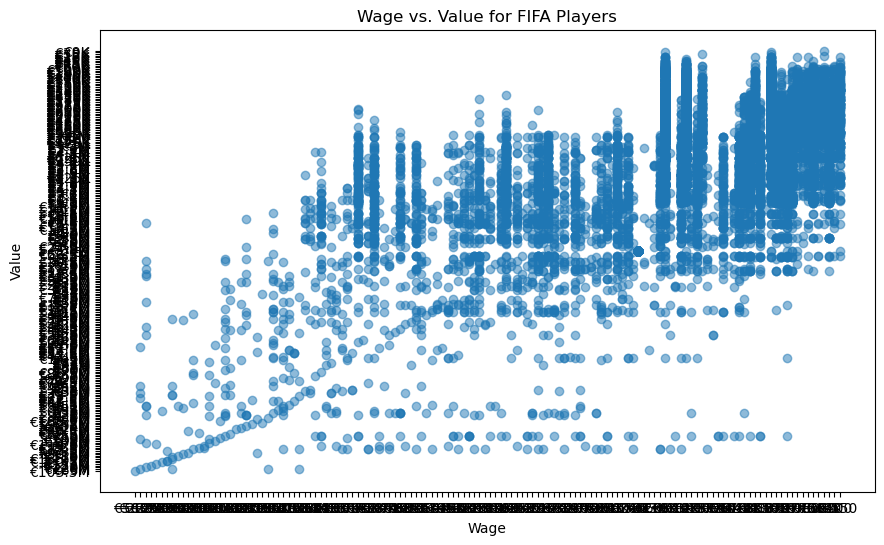

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Wage'], df['Value'], alpha=0.5)
plt.title('Wage vs. Value for FIFA Players')
plt.xlabel('Wage')
plt.ylabel('Value')